# Explore the Andes dataset

In [1]:
%matplotlib notebook

In [19]:
from importlib import reload
import os
import numpy as np 
import matplotlib.pyplot as plt

from astropy.table import Table
from desi_sandbox.spectra import io as dsbx_io

# Load

In [3]:
tbl_file=os.path.join(os.getenv('DESI_UMAP'), 'andes_S2N_spec.fits')

In [4]:
andes_tbl = Table.read(tbl_file)

In [5]:
andes_tbl

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35190982328718648,0,459,459,231,512,104.55545725101197,36.60138233876448,4.900216,-5.4885893,42.29024,47.353317,2015.5,5400.0,545,1,TGT,90.778465,-351.59277,0,59,0.7745636402324717,7,14,8001,527428,1044p365,5432,PSF,1695740200000000.0,1475938800000000.0,0.094205886,58.82356,169.43456,284.13696,229.3759,22.628628,27.123669,0.75663936,0.82873887,0.90025735,1.0721981e-05,3.826281e-06,3.7990158e-06,0.0005179302,0.23572497,0.028075755,0.99999994,0.9999999,0.99999976,6,2,4,1078.5791,236.00189,168.48183,823.558,161.90184,86.61641,135.1858,64.425224,29.44825,257.96872,2.8679764,0.52062815,0.0008355128,1.2016518e-05,0.9841617,0.99024326,0.9979111,0.9992107,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.683174,131.58519,220.66464,45.683174,131.58519,220.66464,0,0,0,940753899756726528,G2,17.070635,860.8483,17.764786,113.19001,16.276514,201.20639,1.2721139,0.0,True,0.16078776,True,0.8088824,94.96686,N,545,59,1,6684,0.0,0.0,0.0,0.0,0,0,0,3,91.095,-349.886,-0.37

# Cut

## $z < 0.3$ Galaxies

In [6]:
lowz = andes_tbl['Z'] < 0.3

In [7]:
not_star = andes_tbl['Z'] > 0.002

In [8]:
galaxy = andes_tbl['SPECTYPE'] == 'GALAXY'

In [9]:
pos_SN = andes_tbl['S_N_r'] > 0.

In [10]:
gd_ID = andes_tbl['TARGETID'] != 999999

In [11]:
all_cuts = lowz & not_star & galaxy & pos_SN & gd_ID
lowz_galaxies = andes_tbl[all_cuts]

In [12]:
lowz_galaxies

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35191001672845101,2,179,2179,1498,0,103.86589939692573,37.4626761212027,-5.949253,-13.102914,73.98624,91.35499,2015.5,5400.0,545,1,TGT,223.20372,-131.07375,0,61,0.6250192956109123,7,14,8001,532040,1038p375,1837,PSF,2810673800000000.0,3222577000000000.0,0.09895703,158.27637,287.974,404.8427,81.54319,27.195646,16.424648,0.7460722,0.82092446,0.8954992,1.9469321e-07,3.8478265e-07,5.7971715e-06,0.040705826,0.0011325234,0.16911651,0.99999887,0.9999996,0.8265284,4,4,4,1183.899,231.229,153.862,881.3629,175.93079,89.43769,129.60544,68.50442,-39.584637,-98.62572,2.930222,0.5339163,0.00068617234,1.0695917e-05,0.9833696,0.9897537,0.9978059,0.99917096,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.48093,222.84644,313.28436,122.48093,222.84644,313.28436,0,0,0,941130521145260672,G2,16.45212,920.1753,16.90676,160.26166,15.840097,418.00482,1.2309062,0.10916541,True,0.110618696,True,0.6749452,162.04828,N,545,61,1,6687,0.0,0.0,0.0,0.0,0,0,0,3,223.057,-130.999,0.003,

### Plot S/N

In [13]:
np.min(lowz_galaxies['S_N_r'])

2.2775514e-05

<IPython.core.display.Javascript object>


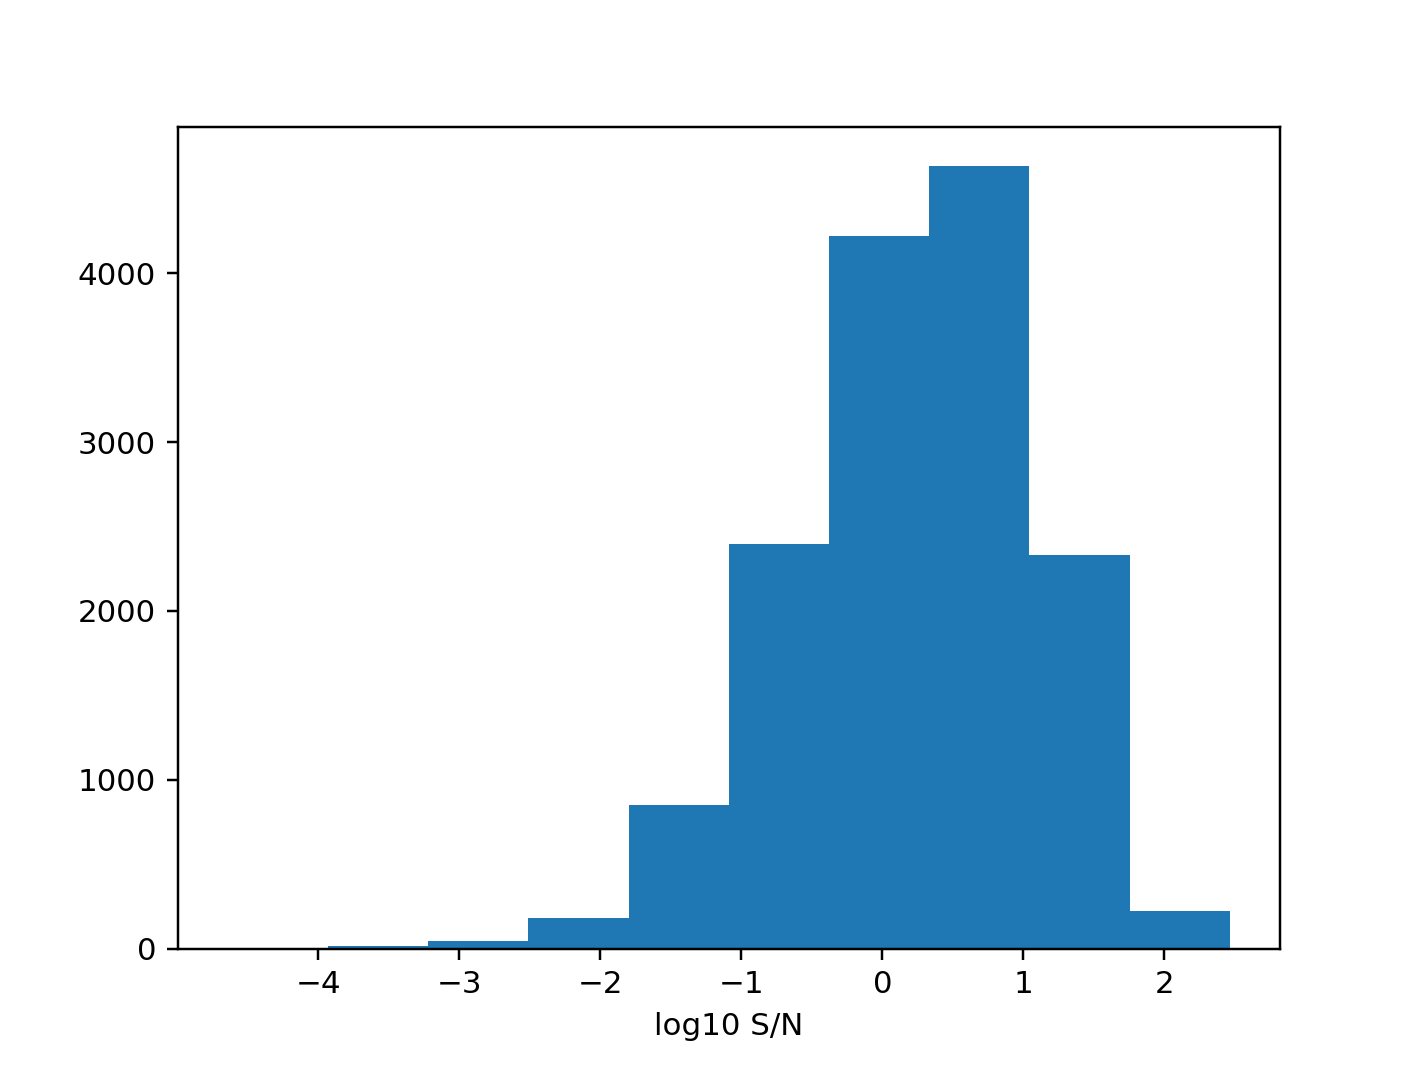

In [15]:
plt.clf()
ax = plt.gca()
ax.hist(np.log10(lowz_galaxies['S_N_r']))
#
ax.set_xlabel('log10 S/N')
plt.show()

### $z$

<IPython.core.display.Javascript object>


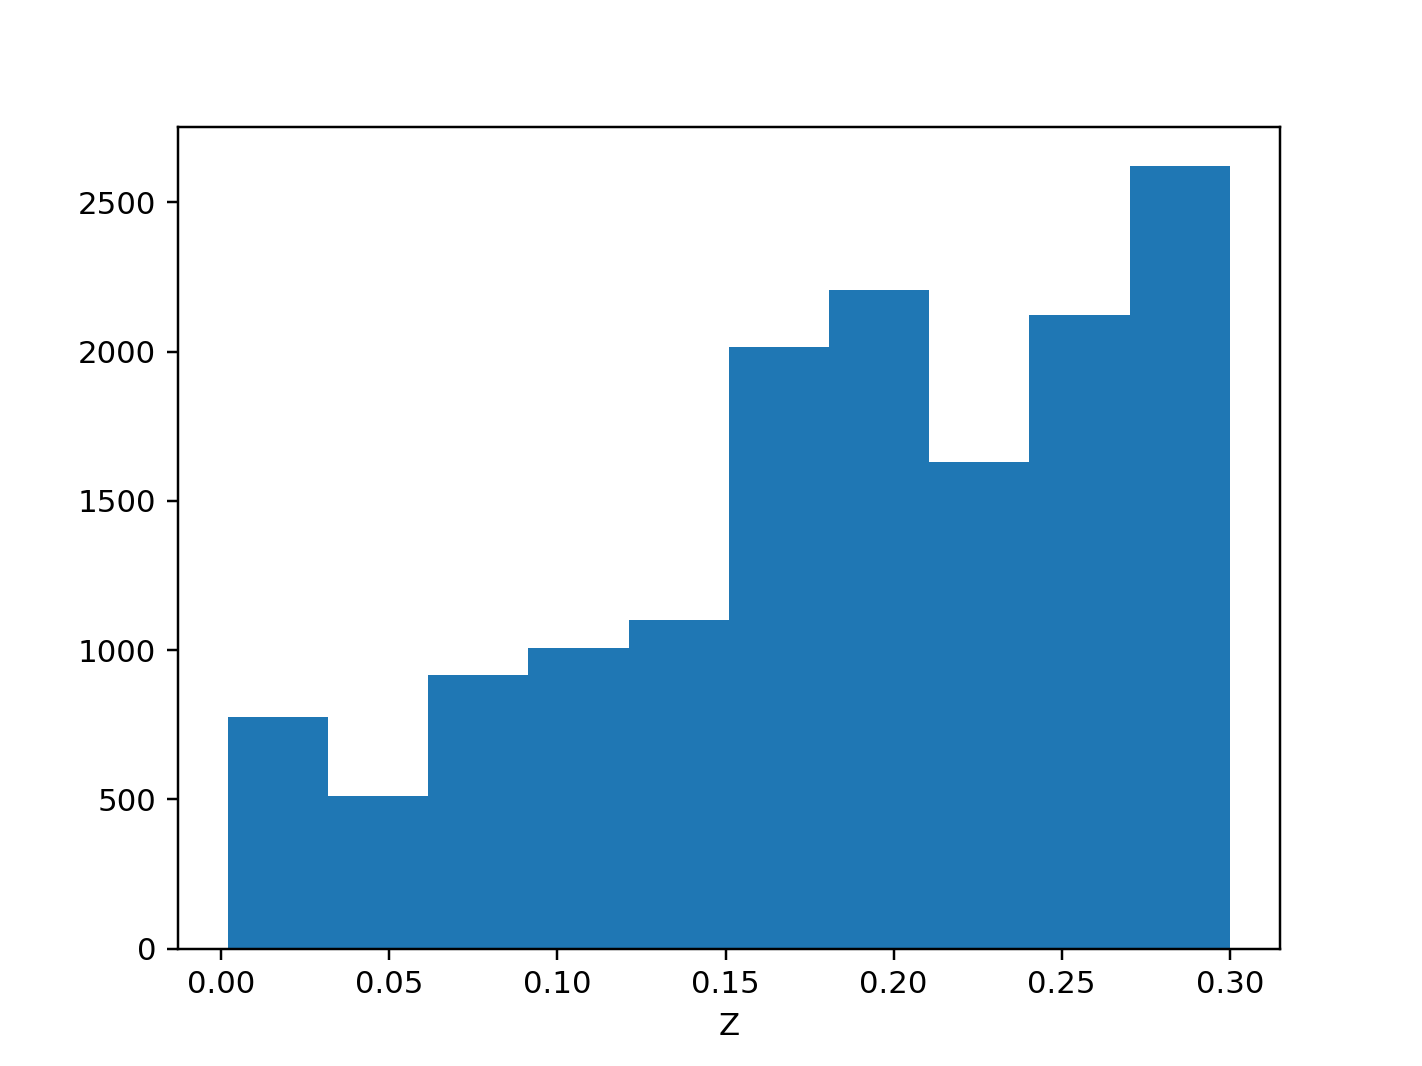

In [16]:
plt.clf()
ax = plt.gca()
ax.hist(lowz_galaxies['Z'])
#
ax.set_xlabel('Z')
plt.show()

## Check one

In [17]:
idx = np.argsort(lowz_galaxies['S_N_r'])
lowz_galaxies[idx[-1]]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35185754749538327,7,266,7266,3689,0,181.1016054578034,-0.14210424593290188,0.0,0.0,0.0,0.0,2015.5,5400.0,256,1,TGT,-273.8589,88.95667,0,1000,0.9671533199463075,65535,99,8000,329652,1811m002,4119,PSF,229772920000.0,5853318000000.0,0.0261465,572.033,707.5251,852.642,2.712086,1.4872365,0.5871077,0.92552054,0.94919866,0.97125804,0.43445265,1.7641991,0.14130943,0.8326388,0.82900524,0.84809464,0.7500768,0.9994548,0.6721956,3,3,2,0.0,0.0,0.0,0.0,0.0,0.0,125.25065,76.10529,-257.37952,3020.7783,2.641527,0.45166585,0.0006360362,8.34698e-06,0.99557877,0.99728245,0.9994198,0.9997809,64,64,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.66037,551.21967,664.27765,478.24414,681.45154,698.94617,0,0,2302,3698901568475452416,G2,17.466085,51.22598,nan,nan,0.0,nan,nan,1.2176191,True,16.391027,True,0.0,0.0,S,256,2100,1,26282,0.0,0.0,0.0,0.0,0,0,0,3,-273.593,88.866,-0.0005000000000000003,0.005333333333333333,0.0,0.0,20200225,52090,58905.25690431,70502,6,0.00733712023435171

In [27]:
reload(dsbx_io)
flux, ivar, wave = dsbx_io.load_andes_obj(lowz_galaxies[idx[-30]])

<IPython.core.display.Javascript object>


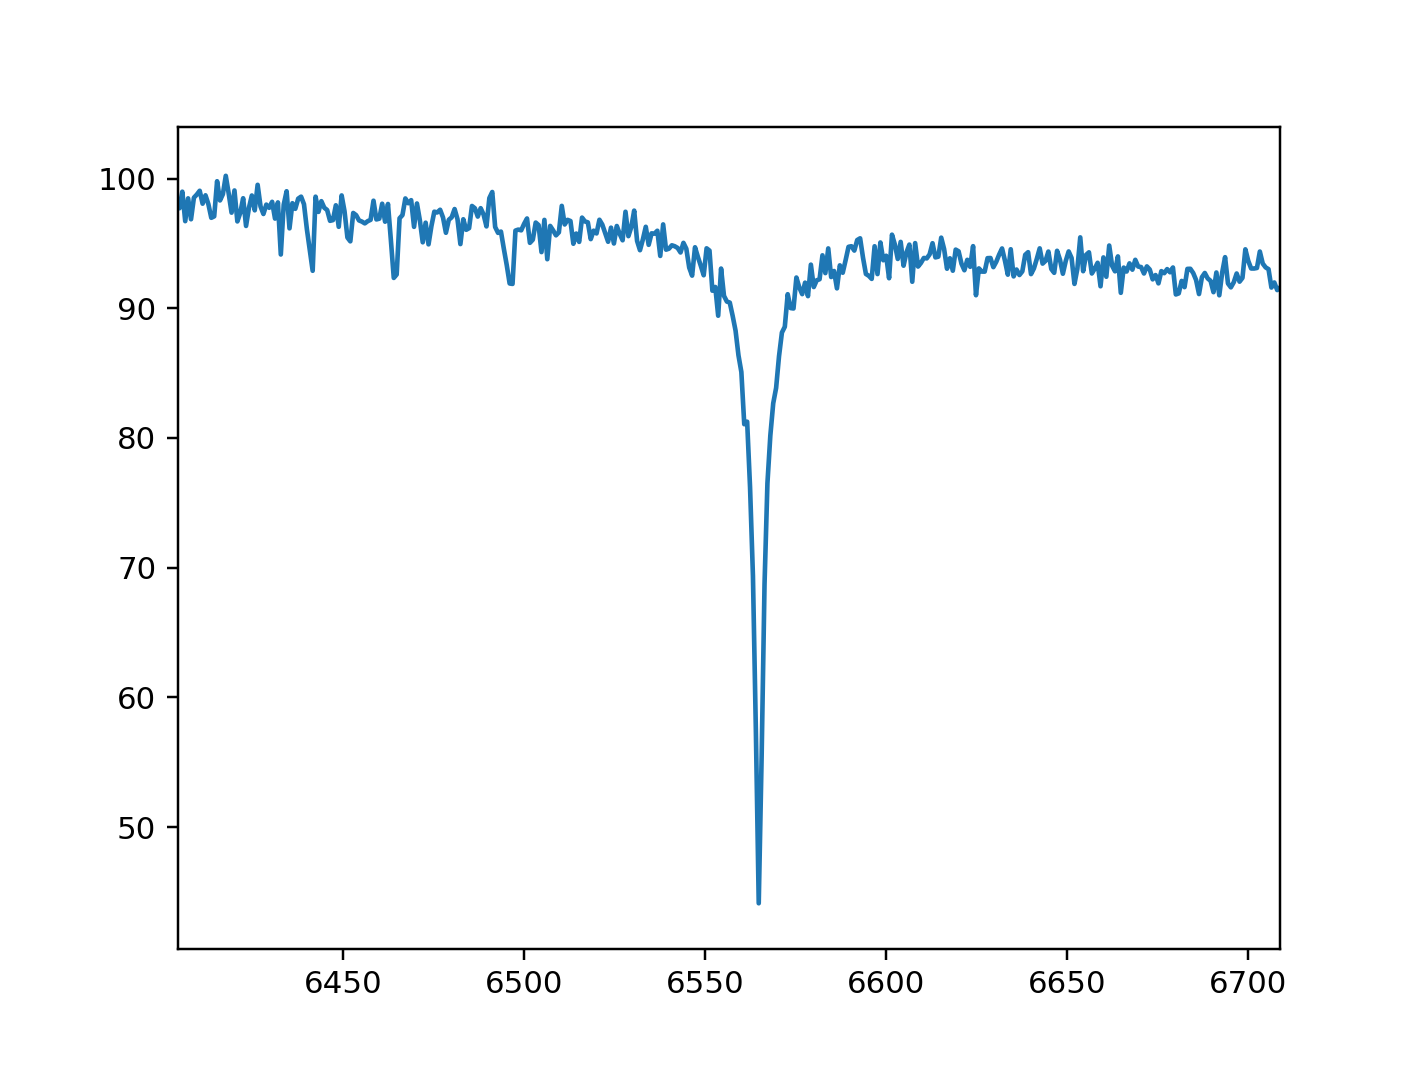

In [28]:
plt.clf()
ax = plt.gca()
ax.plot(wave, flux)
#
plt.show()

## High z

In [29]:
hiz = andes_tbl['Z'] > 0.6

In [37]:
ok_Zwarn = andes_tbl['ZWARN'] == 0

In [38]:
hiz_cuts = hiz & not_star & galaxy & pos_SN & gd_ID & ok_Zwarn
hiz_galaxies = andes_tbl[hiz_cuts]
len(hiz_galaxies)

30962

In [39]:
idx_hi = np.argsort(hiz_galaxies['S_N_r'])
hiz_galaxies[idx_hi[-100]]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35186024325843440,0,343,343,155,0,132.82024799622909,11.038242053717239,-14.548631,-0.19985585,358.55154,776.80255,2015.5,5400.0,40,1,TGT,7.817747,-320.1631,0,2907,0.1917807198499133,65535,99,8000,393924,1328p110,2544,PSF,2.047326e+16,4.4034242e+16,0.04815994,1353.595,2008.9834,1968.4218,5.523097,0.5695348,0.070578285,0.8671327,0.9084342,0.947701,4.5034562e-06,1.7325821e-05,4.81236e-05,0.55193067,0.8464036,0.91630965,1.0000002,1.0000072,0.9999996,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,786.0121,429.2452,142.21803,-660.9818,2.3791625,0.4663722,0.00067955366,8.858893e-06,0.99187154,0.9950002,0.9989316,0.9995964,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1048.6764,1556.4283,1525.0038,1048.678,1556.438,1525.0281,0,0,2204,598670135565898880,G2,14.253848,3616.3394,14.629065,609.45514,13.699139,872.49286,1.229024,0.0,True,0.059393853,True,0.7998882,1100.257,S,40,2907,1,4253,0.0,0.0,0.0,0.0,0,0,0,3,7.814,-319.957,0.004066666666666668,-0.00013333333333333334,0.0,0.0

In [40]:
reload(dsbx_io)
flux, ivar, wave = dsbx_io.load_andes_obj(hiz_galaxies[idx[-100]])

<IPython.core.display.Javascript object>


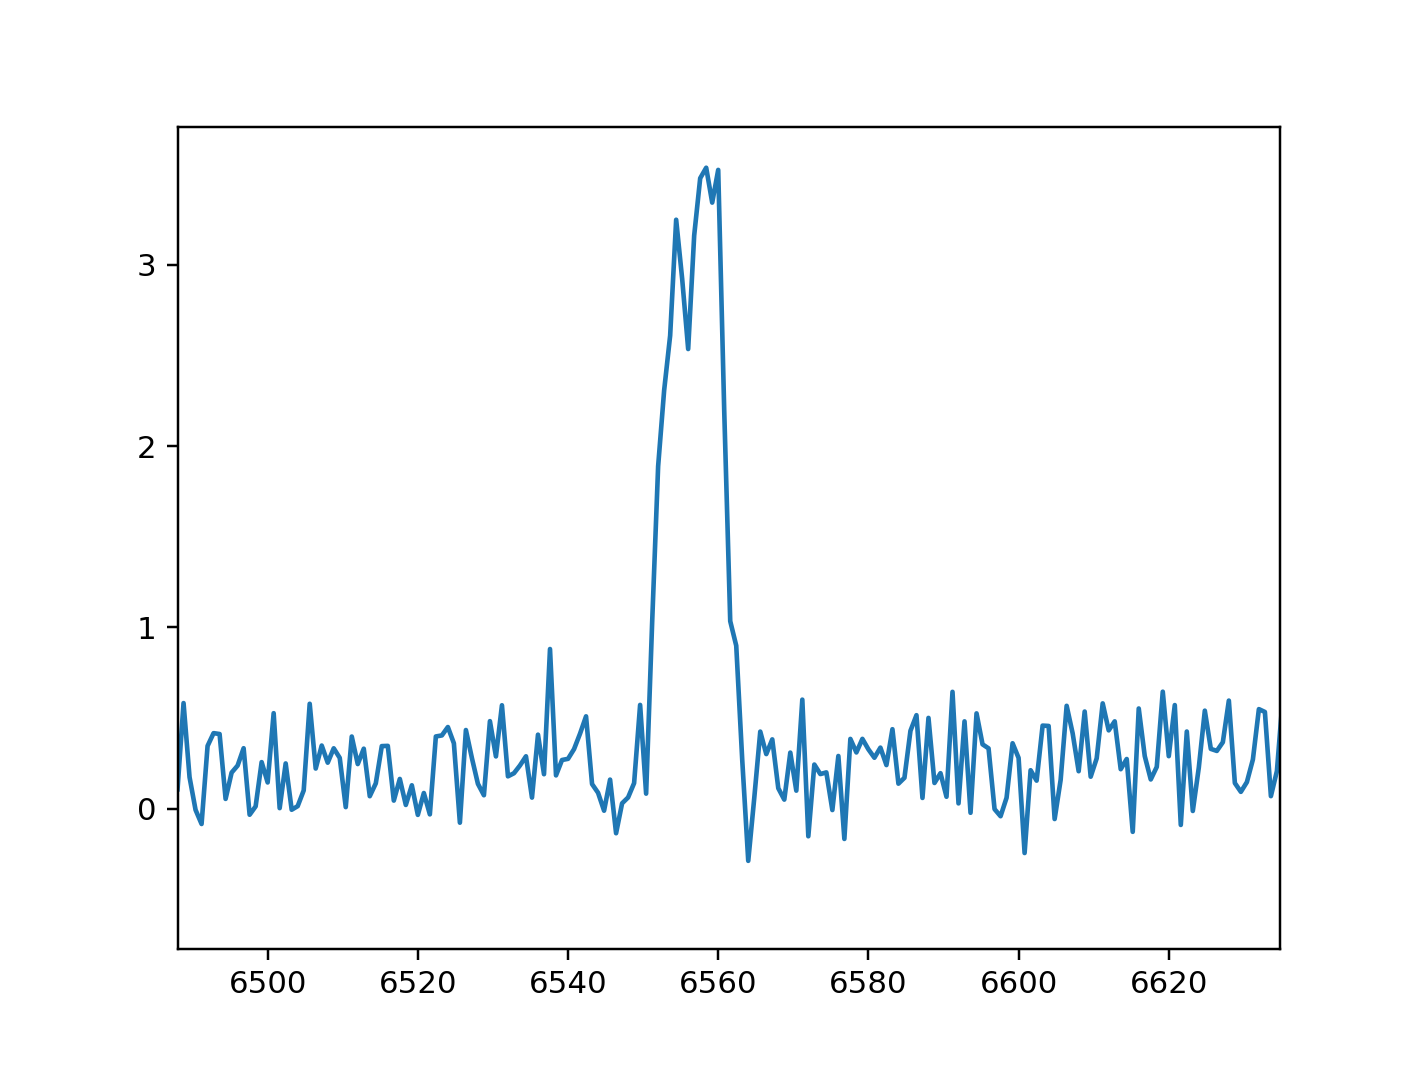

In [41]:
plt.clf()
ax = plt.gca()
ax.plot(wave, flux)
#
plt.show()

# Write

In [42]:
lowz_galaxies.write(os.path.join(os.getenv('DESI_UMAP'), 'andes_glxy_zLT03.fits'), overwrite=True)

In [43]:
hiz_galaxies.write(os.path.join(os.getenv('DESI_UMAP'), 'andes_glxy_zGT06.fits'), overwrite=True)